# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
print(powers_df.head())
heroes_df.head()

    hero_names  Agility  Accelerated Healing  Lantern Power Ring  \
0      3-D Man     True                False               False   
1       A-Bomb    False                 True               False   
2   Abe Sapien     True                 True               False   
3     Abin Sur    False                False                True   
4  Abomination    False                 True               False   

   Dimensional Awareness  Cold Resistance  Durability  Stealth  \
0                  False            False       False    False   
1                  False            False        True    False   
2                  False             True        True    False   
3                  False            False       False    False   
4                  False            False       False    False   

   Energy Absorption  Flight  ...  Web Creation  Reality Warping  Odin Force  \
0              False   False  ...         False            False       False   
1              False   False  ... 

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df = heroes_df.drop('Unnamed: 0', axis=1)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
display(heroes_df.info())
display(heroes_df.describe())
display(heroes_df.isna().sum())

display(powers_df.info())
display(powers_df.describe())
display(powers_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


None

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


None

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Jennifer Kale,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
Cold Resistance          0
Durability               0
Stealth                  0
Energy Absorption        0
Flight                   0
Danger Sense             0
Underwater breathing     0
Marksmanship             0
Weapons Master           0
Power Augmentation       0
Animal Attributes        0
Longevity                0
Intelligence             0
Super Strength           0
Cryokinesis              0
Telepathy                0
Energy Armor             0
Energy Blasts            0
Duplication              0
Size Changing            0
Density Control          0
Stamina                  0
Astral Travel            0
Audio Control            0
Dexterity                0
                        ..
Intuitive aptitude       0
Vision - Microscopic     0
Melting                  0
Wind Control             0
Super Breath             0
Wallcrawling             0
V

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [5]:
heroes_df.isna().any()

name          False
Gender        False
Eye color     False
Race          False
Hair color    False
Height        False
Publisher      True
Skin color    False
Alignment     False
Weight         True
dtype: bool

In [6]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [7]:
heroes_df.Weight.fillna(heroes_df.Weight.median(), inplace=True)

In [8]:
heroes_df.Publisher.fillna('Unknown', inplace=True)

In [9]:
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

There were two null values in the weight column.  I have decided to replace those with the median values since the proportion of missing values to total values is so low.  There were also 15 null values in the publisher column.  I have decided to treat those as their own classification and have changed the null value to the the string 'Unknown'.

In [10]:
powers_df.isna().any()

hero_names               False
Agility                  False
Accelerated Healing      False
Lantern Power Ring       False
Dimensional Awareness    False
Cold Resistance          False
Durability               False
Stealth                  False
Energy Absorption        False
Flight                   False
Danger Sense             False
Underwater breathing     False
Marksmanship             False
Weapons Master           False
Power Augmentation       False
Animal Attributes        False
Longevity                False
Intelligence             False
Super Strength           False
Cryokinesis              False
Telepathy                False
Energy Armor             False
Energy Blasts            False
Duplication              False
Size Changing            False
Density Control          False
Stamina                  False
Astral Travel            False
Audio Control            False
Dexterity                False
                         ...  
Intuitive aptitude       False
Vision -

In [11]:
powers_df.isna().any().any()

False

There were no missing values in the power_df DataFrame.

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [12]:
powers_df.rename(columns = {'hero_names':'name'}, inplace=True)

In [13]:
heroes_with_powers_df = powers_df.set_index('name').join(heroes_df.set_index('name'), how='inner')

In [14]:
heroes_with_powers_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

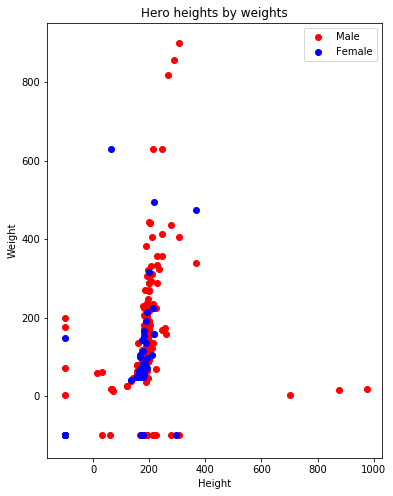

In [15]:
male_heroes_df = heroes_with_powers_df.loc[heroes_with_powers_df['Gender'] == 'Male']
female_heroes_df = heroes_with_powers_df.loc[heroes_with_powers_df['Gender'] == 'Female']

fig1 = plt.figure(figsize=(6,8))

ht_by_wt=fig1.add_subplot(111)
ht_by_wt.scatter(male_heroes_df.Height, male_heroes_df.Weight, color='red')
ht_by_wt.scatter(female_heroes_df.Height, female_heroes_df.Weight, color='blue')

ht_by_wt.set_xlabel('Height')
ht_by_wt.set_ylabel('Weight')
ht_by_wt.set_title('Hero heights by weights')
ht_by_wt.legend(['Male','Female'])

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [16]:
male_heroes_df = heroes_with_powers_df[heroes_with_powers_df['Gender'] == 'Male']
female_heroes_df = heroes_with_powers_df[heroes_with_powers_df['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    plt.plot()
    sns.distplot(dataframe[column_name])
    plt.title("Distribution of {} among {} heroes.".format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel("Density")

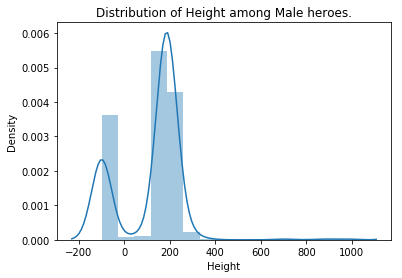

In [17]:
# Male Height
show_distplot(male_heroes_df, "Male", 'Height')

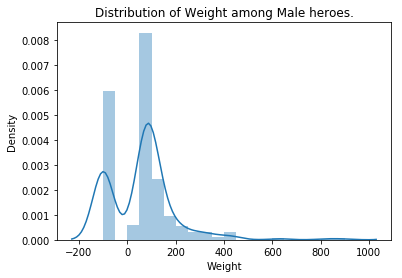

In [18]:
# Male Weight
show_distplot(male_heroes_df, "Male", 'Weight')

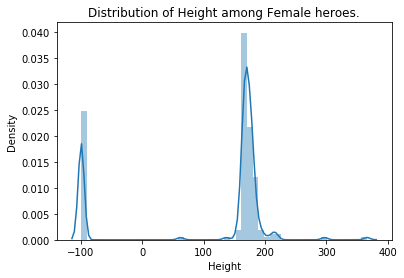

In [19]:
# Female Height
show_distplot(female_heroes_df, "Female", 'Height')

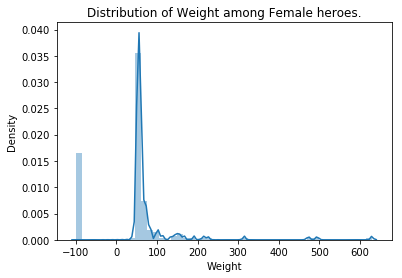

In [20]:
# Female Weight
show_distplot(female_heroes_df, "Female", 'Weight')

In [21]:
male_heroes_df.describe()

,Height,Weight
count,464.000000,464.000000
mean,117.084052,59.295259
std,141.224950,139.742718
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,183.000000,79.000000
75%,188.000000,101.000000
max,975.000000,900.000000


In [22]:
female_heroes_df.describe()

,Height,Weight
count,178.000000,178.000000
mean,111.693820,36.651685
std,117.529527,102.943800
min,-99.000000,-99.000000
25%,157.000000,48.250000
50%,168.000000,54.500000
75%,175.000000,61.000000
max,366.000000,630.000000


Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________
All of the plots are bimodal with a huge subset of outliers located at value -99. Likely these are missing values, however due to the massive number of them, I'm hesitant to remove them from the data set. In addition, there are some extreme outliers as well, which is unsurprising since we are talking about super heroes.  The max values for male height and weight are both >= 900, and even the females have some huge numbers with a max height of 366 aand a max weight of 630.  The distributions all have positive skews due to these outliers pulling the mean away from the median and modes.  This is further shown by the absurdly high standard deviations (male height, weight = 117.08, 59.30 and female height, weight = 117.53, 102.94).


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [23]:
def power_counter(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1)
        
    power_counts_dict = dict(df.sum())
    
    return sorted(power_counts_dict.items(), key=lambda x: x[1], reverse=True)[:5]
overall_top_5 =power_counter(heroes_with_powers_df)
overall_top_5

[('Super Strength', 362),
 ('Stamina', 294),
 ('Durability', 262),
 ('Super Speed', 251),
 ('Agility', 244)]

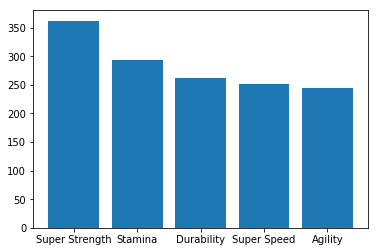

In [24]:
def plotter(series):
    powers = []
    counts = []
    for i in series:
        powers.append(i[0])
        counts.append(i[1])
    plt.bar(powers, counts)
plotter(overall_top_5)

In [25]:
marvel_heroes_df = heroes_with_powers_df[heroes_with_powers_df.Publisher == 'Marvel Comics']
dc_heroes_df = heroes_with_powers_df[heroes_with_powers_df.Publisher == 'DC Comics']

In [26]:
marvel_powers = power_counter(marvel_heroes_df)
marvel_powers

[('Super Strength', 204),
 ('Durability', 154),
 ('Stamina', 150),
 ('Super Speed', 137),
 ('Agility', 126)]

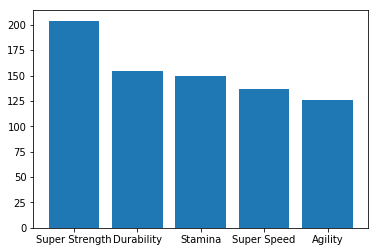

In [27]:
plotter(marvel_powers)

In [28]:
dc_powers = power_counter(dc_heroes_df)
dc_powers

[('Super Strength', 109),
 ('Stamina', 90),
 ('Flight', 86),
 ('Super Speed', 79),
 ('Agility', 71)]

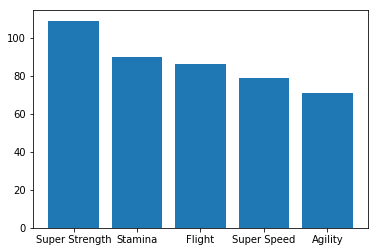

In [29]:
plotter(dc_powers)

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________
The top 5 powers were very similar in the Marvel and DC universes.  The only difference was the addition of flight in DC over durability.  The distributions were very similar as well.  Marvel's distribution nearly matched the distribution of the overall power counts as well.

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________

How many powers only have a single occurance and do they cooccur with other powers?  How many powers on average? Are heroes with unique powers more common in DC or Marvel?  Are heroes with unique powers more likely to have extra powers in DC or Marvel?

Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [30]:
#First I will find the powers with only a single occurance
just_powers = heroes_with_powers_df.drop(heroes_df.columns.values[1:], axis=1)
occurance_counts = dict(just_powers.sum())
single_occurances = []
for count in occurance_counts:
    if occurance_counts[count] == 1:
        single_occurances.append(count)
single_occurances

['Omnitrix',
 'Hyperkinesis',
 'Electrical Transport',
 'Anti-Gravity',
 'Banish',
 'Thirstokinesis',
 'Hair Manipulation',
 'Changing Armor',
 'Biokinesis',
 'Spatial Awareness',
 'Intuitive aptitude',
 'Speed Force',
 'Phoenix Force',
 'Molecular Dissipation',
 'Vision - Cryo']

In [31]:
#Great, there are 15 powers that only occur on 1 hero!  Now lets see if they cooccur with other powers. 
single_occurances_df = just_powers[just_powers[single_occurances].sum(1)> 0]
single_occurances_dict = dict(single_occurances_df.sum())
cooccurances = sorted(single_occurances_dict.items(), key= lambda x: x[1], reverse=True)
cooccurances[:10]

[('Longevity', 6),
 ('Super Strength', 6),
 ('Super Speed', 6),
 ('Telekinesis', 6),
 ('Agility', 5),
 ('Durability', 5),
 ('Energy Absorption', 5),
 ('Flight', 5),
 ('Energy Blasts', 5),
 ('Force Fields', 5)]

the mean number of powers possessed by a hero with a unique power is 11.93
The median number of powers possessed by a hero with a unique power is 8.5


([<matplotlib.axis.XTick at 0x1a25ba6470>,
 <a list of 14 Text xticklabel objects>)

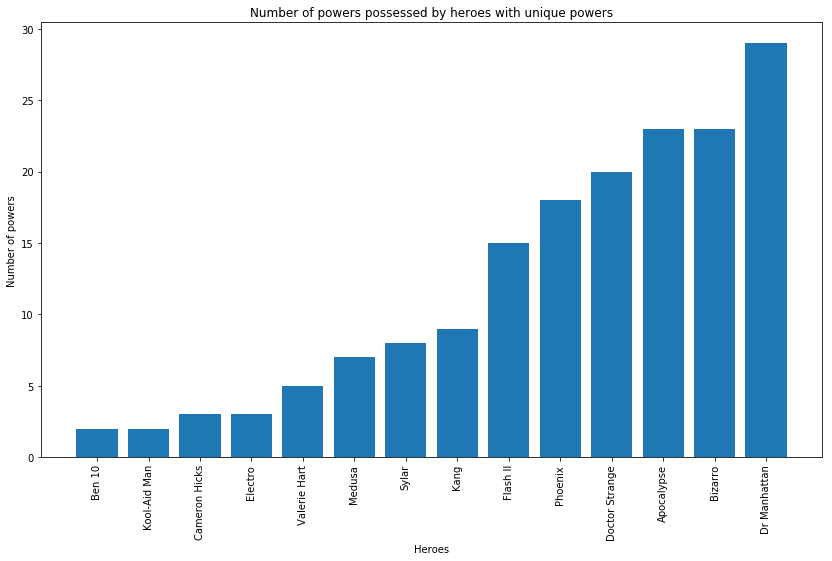

In [32]:
#So it looks like we have some cooccurances! Above are the 10 most common powers to coocur with unique powers.  
#Lets see which heroes have coocurances, how many powers they have, and the average number of powers:
single_occurances_heroes_dict = dict(single_occurances_df.sum(1))
single_occurances_heroes = sorted(single_occurances_heroes_dict.items(), key=lambda x: x[1])
x = []
y = []
for hero in single_occurances_heroes:
    x.append(hero[0])
    y.append(hero[1])
labels = x
print(f"the mean number of powers possessed by a hero with a unique power is {round(sum(y)/len(y), 2)}")
print(f"The median number of powers possessed by a hero with a unique power is {(y[int(len(y)/2)] + y[int((len(y)/2)-1)])/2}")
fig1 = plt.figure(figsize = (14,8))
unique_heroes = fig1.add_subplot(111)
unique_heroes.bar(x,y)
unique_heroes.set_xlabel('Heroes')
unique_heroes.set_ylabel('Number of powers')
unique_heroes.set_title('Number of powers possessed by heroes with unique powers')
plt.xticks(x, labels, rotation='vertical')

In [33]:
#Now let's break down those heroes by publisher.
unique_powers_df = heroes_with_powers_df[heroes_with_powers_df[single_occurances].sum(1)> 0]
unique_powers_df = unique_powers_df.drop(['Height', 'Weight'], axis = 1)
marvel_unique_powers_df = unique_powers_df[unique_powers_df['Publisher'] == 'Marvel Comics']
dc_unique_powers_df = unique_powers_df[unique_powers_df['Publisher'] == 'DC Comics']
print(len(marvel_unique_powers_df), len(dc_unique_powers_df))

6 4


(0, 30)

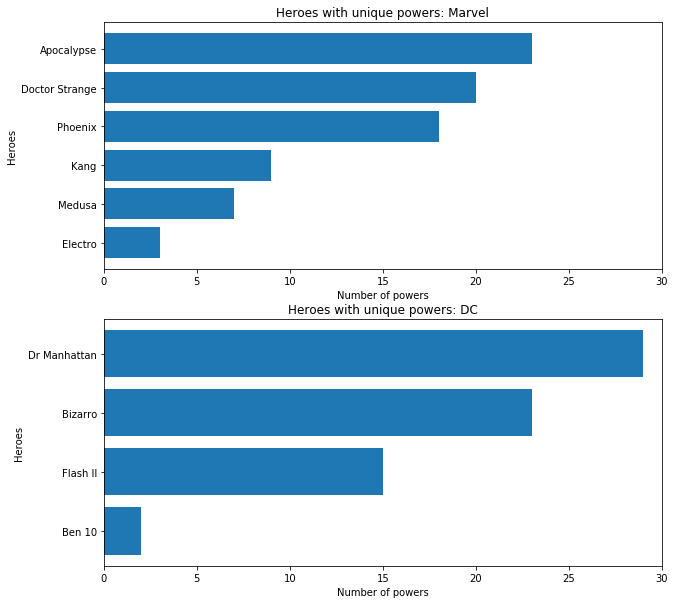

In [34]:
#Looks like marvel has more heroes with unique powers.  Lets look at the power counts of the heroes side by side.
marvel_unique_heroes_dict = dict(marvel_unique_powers_df.sum(1))
marvel_unique_heroes = sorted(marvel_unique_heroes_dict.items(), key=lambda x: x[1])
marvel_x = []
marvel_y = []
for hero in marvel_unique_heroes:
    marvel_x.append(hero[0])
    marvel_y.append(hero[1])
marvel_labels = x

dc_unique_heroes_dict = dict(dc_unique_powers_df.sum(1))
dc_unique_heroes = sorted(dc_unique_heroes_dict.items(), key=lambda x: x[1])
dc_x = []
dc_y = []
for hero in dc_unique_heroes:
    dc_x.append(hero[0])
    dc_y.append(hero[1])
dc_labels = x

fig2 = plt.figure(figsize = (10,10))

marvel_plot=fig2.add_subplot(211)
dc_plot = fig2.add_subplot(212)

marvel_plot.barh(marvel_x, marvel_y)
marvel_plot.set_title('Heroes with unique powers: Marvel')
marvel_plot.set_ylabel('Heroes')
marvel_plot.set_xlabel('Number of powers')
marvel_plot.set_xlim(0,30)

dc_plot.barh(dc_x, dc_y)
dc_plot.set_title('Heroes with unique powers: DC')
dc_plot.set_ylabel('Heroes')
dc_plot.set_xlabel('Number of powers')
dc_plot.set_xlim(0,30)

In [35]:
#Finally, lets look at some statistics:
marvel_mean = sum(marvel_y)/len(marvel_y)
marvel_median = (marvel_y[int(len(marvel_y)/2)] + marvel_y[int((len(marvel_y)/2)-1)])/2

dc_mean = sum(dc_y)/len(dc_y)
dc_median = (dc_y[int(len(dc_y)/2)] + dc_y[int((len(dc_y)/2)-1)])/2

print(f"For Marvel heroes with a unique power, the mean number of powers is {marvel_mean}, and the median is {marvel_median}.")
print(f"For DC heroes with a unique power, the mean number of powers is {dc_mean}, and the median is {dc_median}.")

For Marvel heroes with a unique power, the mean number of powers is 13.333333333333334, and the median is 13.5.
For DC heroes with a unique power, the mean number of powers is 17.25, and the median is 19.0.


It looks like on average DC heros with unique abilities have more powers, but marvel heroes are more likely to have a unique power.

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data